## Neural Network
- 가중치 매개변수의 적절한 값을 데이터로 자동으로 학습하는 능력O
### 활성화 함수
- 입력 신호의 총합이 활성화를 일으키는지 정함
- 층 쌓는 효과를 위해선 활성화 함수는 무조건 비선형 함수여야 함(선형함수는 제곱해도 의미 없음)

In [2]:
%pip install numpy 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.8 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def ReLU(x):
    if x < 0:
        return 0
    else:
        return x 
#######################################
def relu(x):
    return np.maximum(0, x)

### 다차원 배열의 계산

In [9]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
np.ndim(A)  # 차원수
A.shape     # 1차원도 다차원과 통일된 형태로 반환하기 위해 튜플로 반환

[1 2 3 4]


(4,)

In [10]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
np.ndim(B)
B.shape     # 3x2 행렬

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

### 행렬곱
- np.dot()
    - np.dot(A, B)와 np.dot(B, A)는 다를 수 있음
- 행렬끼리 차원수가 맞아야 함
    - 3x2 • 2x4 = 3x4
    - 3x2 • 2 = 3

In [11]:
# 신경망에서의 행렬 곱
# X • W = Y
# 2 • 2x3 = 3
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)

print(Y)

[ 5 11 17]


In [12]:
# 3층 신경망 구현
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def identity_function(x): return x 

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y 

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- 회귀: 항등 함수(identity function)
- 분류: 소프트맥스 함수(softmax functin)
    - 출력: 0~1 사이의 실수
    - 출력 총합: 1
    - 확률로 해석됨 

In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)   # 오버플로를 막기 위함
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y 

In [14]:
# 404 에러 떠서 url로 MNIST 받지 않고 keras에서 가져오겠듬

### MNIST 데이터셋 활용해서 손글씨 숫자 인식
# import sys, os
# sys.path.append(os.path.join(os.getcwd(), "data"))
# from data.mnist import load_mnist

# (x_train, t_train), (x_test, t_test) = \
#     load_mnist(flatten = True, normalize = False)

# print(x_train.shape)
# print(t_train.shape)
# print(x_test.shape)
# print(t_test.shape)

In [10]:
%pip install tensorflow

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 11.9 MB/s  0:00:16m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 10.6 MB/s  0:00:01m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.8/663.8 kB 10.4 MB/s  0:00:00
Using cached idna-3.10-py3-none-any.whl (70 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.2 MB/s  0:00:00 eta 0:00:01
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
Using cached certifi-2025.8.3-py3-none-any.whl (161 kB)
   ━━

In [15]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1)
x_test  = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [2]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.3 MB/s  0:00:01m0:00:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


훈련 데이터: (60000, 28, 28) (60000,)
테스트 데이터: (10000, 28, 28) (10000,)


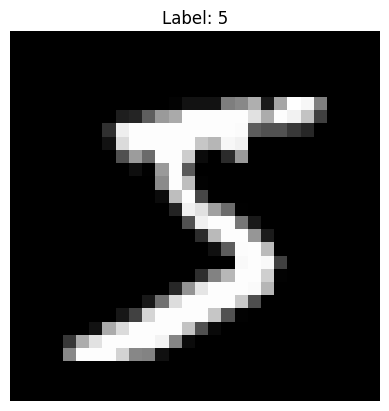

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("훈련 데이터:", x_train.shape, y_train.shape)
print("테스트 데이터:", x_test.shape, y_test.shape)

# 첫번째 이미지 보기
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

### 신경망의 추론 처리
- 입력층 뉴런 784개, 출력층 뉴런 10개로 구성
    - 이미지 크기가 28*28 = 784
    - 0~9의 숫자를 구분하는 거라 10개
- 은닉층은 두개
    1. 50개 뉴런
    2. 100개 뉴런
    - 50개와 100개는 임의로 정한 값 

In [2]:
%pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


- sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽어옴
- 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장돼있음

In [17]:
import os
import pickle
def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    
    # flatten
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test  = x_test.reshape(x_test.shape[0], -1)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y 

In [18]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
  if p == t[i]:
    accuracy_cnt += 1
    
print("Accurach:" + str(float(accuracy_cnt) / len(x)))

Accurach:0.9207


/var/folders/f9/xkvr5f9j46v9vs9zn6hm6p5m0000gn/T/ipykernel_20612/2743225879.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [24]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape
x[0].shape
W1.shape
W2.shape
W3.shape

(100, 10)

In [26]:
# 배치 처리 구현
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])
  
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207


/var/folders/f9/xkvr5f9j46v9vs9zn6hm6p5m0000gn/T/ipykernel_20612/2743225879.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [27]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
list(range(0, 10 ,3))

[0, 3, 6, 9]

In [29]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [30]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
print(np.sum(y==t))

[ True  True False  True]
3
